
### Problem Statement :

you will build Regression models which accurately predict the popularity of new articles (the number of times it will be shared online) based on ~60 features provided to you.

#### Importance of online news
The consumption of online news is expediting day by day due to the extensive adoption of smartphones and the rise of social networks. Note that online news content comprises various key properties. For example, it is easily produced and small in size; its lifespan is short and the cost is low. Such Qualities make news content more effective to be consumed on social sharing platforms. More interestingly, this sort of content can capture the eye of a signiﬁcant amount of Internet users within a brief period of your time. As a result, the main target on the analysis of online news content like predicting the recognition of stories articles, demonstrating the decay of interest over time to know the world of online news has greatly increased since it has so many practical meanings.

#### Why news popularity prediction?
There are multiple areas of applications for online news popularity prediction. Some of these benefits include gaining better insights into the audience consuming online news content. Consequently, it increases the ability of news organizations to deliver more relevant and appealing content in a proactive manner as well as the company can allocate resources more wisely to prepare stories over their life cycle. Moreover, prediction of news content is also beneﬁcial for trend forecasting, understanding the collective human behavior, advertisers to propose more proﬁtable monetization techniques, and readers to ﬁlter the huge amount of information quickly and efﬁciently.

### Step 1 : Importing and Inspecting the data 

In [1]:
# Importing all the necessary libraries

# removing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# reading the training data 
news_train=pd.read_csv('train.csv')

In [3]:
# checking  the shape of the data set
news_train.shape

(29733, 61)

In [4]:
# checking the top 5 rows of train data set
news_train.tail()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
29728,29728,http://mashable.com/2013/09/03/microsoft-nokia...,8.0,587.0,0.474606,1.0,0.661392,9.0,3.0,1.0,0.0,4.563884,7.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,531.0,217.571429,3100.0,843300.0,232657.142857,1082.636364,3256.405327,2081.580542,3100.0,6100.0,4600.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344328,0.029109,0.028572,0.028572,0.569420,0.484231,0.176979,0.035775,0.015332,NaN,0.300000,0.440363,0.100000,1.000000,-0.201609,-0.6,-0.071429,0.000000,0.000000,0.500000,0.000000,877
29729,29729,http://mashable.com/2013/03/16/game-of-thrones...,12.0,129.0,0.760000,1.0,0.855263,3.0,NaN,0.0,1.0,4.325581,7.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,NaN,507.428571,3800.0,617900.0,278128.571429,1959.625000,4892.433286,3472.084657,1400.0,3000.0,2200.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.028626,0.346606,0.028584,0.567600,0.028585,0.390917,0.006827,0.046512,0.038760,0.545455,0.454545,0.248124,0.136364,0.333333,-0.313333,-0.4,-0.166667,0.427273,-0.131818,0.072727,0.131818,22300
29730,29730,http://mashable.com/2014/03/17/ray-william-joh...,11.0,566.0,0.513369,1.0,0.707831,5.0,4.0,2.0,0.0,4.669611,10.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,349.555556,0.0,843300.0,118400.000000,0.000000,3574.193129,2266.324467,6400.0,6400.0,6400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119922,0.020038,0.020002,0.020001,0.820038,0.521687,0.211169,0.084806,NaN,0.786885,0.213115,0.370635,0.050000,1.000000,-0.275962,-0.7,-0.012500,0.100000,0.300000,NaN,0.300000,2700
29731,29731,http://mashable.com/2013/05/20/jobs-new-york-t...,12.0,802.0,0.487469,1.0,0.611722,21.0,NaN,0.0,0.0,5.573566,5.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,590.0,385.400000,1500.0,690400.0,305760.000000,1148.333333,4105.472222,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.839999,0.040000,0.040000,0.040000,0.040000,0.338022,0.156850,0.071072,0.004988,0.934426,0.065574,0.265382,0.033333,1.000000,-0.168750,-0.3,-0.071429,0.477273,0.318182,0.022727,NaN,646
29732,29732,http://mashable.com/2014/04/03/david-letterman...,13.0,510.0,0.555332,1.0,0.730519,3.0,3.0,0.0,11.0,4.484314,6.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,989.0,234.265000,4500.0,843300.0,579666.666667,2897.250000,6039.121049,NaN,3600.0,29800.0,14500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.033381,0.033604,0.196949,0.702718,0.033348,0.585132,0.060767,0.058824,0.049020,0.545455,0.454545,0.402333,0.050000,1.000000,-0.339667,-1.0,-0.050000,0.200000,0.300000,0.300000,0.300000,3400


In [5]:
# reading the test data
news_test_set=pd.read_csv('test.csv')

In [6]:
# checking the top 5 rows of test data set
news_test_set.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,29733,http://mashable.com/2014/12/05/2014-cant-unsee/,10.0,564.0,0.505618,1.0,0.637394,21.0,1.0,0.0,3.0,4.723404,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.65625,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.10,1.0,0.0,0.5,0.0
1,29734,http://mashable.com/2014/01/02/twitter-new-yea...,12.0,1127.0,0.431298,1.0,0.621622,10.0,6.0,11.0,0.0,4.360248,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.75000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,NaN,0.0,0.0,0.5,0.0
2,29735,http://mashable.com/2014/06/11/gopro-value-3-b...,10.0,400.0,0.564232,1.0,0.698795,1.0,0.0,1.0,1.0,4.765000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.59375,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.15,0.0,0.0,0.5,0.0
3,29736,http://mashable.com/2014/10/08/spanish-ebola-d...,12.0,798.0,0.435279,1.0,0.613054,2.0,2.0,3.0,1.0,3.984962,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,NaN,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.05,0.0,0.0,0.5,0.0
4,29737,http://mashable.com/2014/02/09/jennifer-lawren...,11.0,1010.0,0.464503,1.0,0.611727,32.0,2.0,1.0,0.0,5.180198,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.65000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,NaN,0.0,0.0,0.5,0.0


In [7]:
# adding a shares column in the test set with value -1 so that it can be easily identified as invalid value and we can concat
# both the data frame
news_test_set['shares']=-1

In [8]:
# checking the shape of the data frame
news_test_set.shape

(9911, 61)

In [9]:
# Making a new data frame from the train and test data set by concatinating them
news=pd.concat([news_train,news_test_set],axis=0)

In [10]:
# checking the shape of the concatenated data frame
news.shape

(39644, 61)

In [11]:
# lets check the data types of the columns  
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 9910
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             39644 non-null  int64  
 1   url                            39644 non-null  object 
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      38558 non-null  float64
 8   num_self_hrefs                 33508 non-null  float64
 9   num_imgs                       32379 non-null  float64
 10  num_videos                     38845 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39012 non-null  

In [12]:
# checking out the missing values percentage
round(news.isna().sum()/len(news)*100,2)

id                                0.00
url                               0.00
n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
num_hrefs                         2.74
num_self_hrefs                   15.48
num_imgs                         18.33
num_videos                        2.02
average_token_length              0.00
num_keywords                      1.59
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.63
kw_max_min                        1.49
kw_avg_min                        0.28
kw_min_max                        0.43
kw_max_max                        5.09
kw_avg_max                        0.38
kw_min_avg               

In [13]:
# checking for the outliers in the numerical columns
news.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,38558.000000,33508.000000,32379.000000,38845.000000,39644.000000,39012.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,38203.000000,39052.000000,39533.000000,39475.000000,37625.000000,39493.000000,39232.000000,38738.000000,38379.000000,39254.000000,37354.000000,39218.000000,38339.000000,38630.000000,37610.000000,39245.000000,38491.000000,39527.000000,37657.000000,36773.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,36646.000000,39195.000000,38536.000000,38439.000000,38882.000000,38866.000000,38010.000000,39028.000000,39430.000000,39398.000000,38627.000000,38681.000000,39477.000000,39297.000000,38573.000000,37748.000000,39644.000000
mean,19821.500000,10.398749,546.514731,0.548216,0.996469,0.689175,10.896416,3.302644,4.581241,1.251770,4.548239,7.225264,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.077716,1156.812442,312.440724,13611.381634,752672.704319,259230.625603,1116.925769,5650.207861,3135.411159,4007.002953,10394.240504,6420.676020,0.167714,0.186332,0.188062,0.183437,0.143748,0.061907,0.068619,0.130694,0.184599,0.141256,0.216321,0.223770,0.234029,0.443480,0.119279,0.039641,0.016606,0.682310,0.287829,0.353631,0.095411,0.756924,-0.259472,-0.521866,-0.107462,0.282399,0.071705,0.341975,0.155926,2579.630436
std,11444.381373,2.114037,471.107508,3.520708,5.231231,3.264816,11.350621,3.885634,8.438382,4.112057,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.605200,3882.946259,621.521797,57984.357339,213947.615685,135081.756079,1137.391605,5935.108186,1303.606842,19821.073290,41502.430461,24326.080312,0.373617,0.389379,0.390767,0.387030,0.350838,0.240990,0.252809,0.337070,0.262975,0.219707,0.282145,0.295191,0.289183,0.116464,0.096961,0.017430,0.010825,0.190345,0.156093,0.104664,0.071356,0.247730,0.127799,0.290540,0.095522,0.324305,0.265683,0.188740,0.226219,10680.401086
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000
25%,9910.750000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,446.000000,141.750000,0.000000,843300.000000,172800.000000,0.000000,3562.101631,2382.792086,638.000000,1100.000000,983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.02

In [14]:
news.tail()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
9906,39639,http://mashable.com/2014/09/18/twitter-iphone-...,8.0,559.0,0.527514,1.0,0.618132,28.0,3.0,26.0,0.0,4.354204,9.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,330.0,176.888889,34300.0,843300.0,324855.555556,3479.478861,8880.022321,5955.427525,4100.0,4100.0,4100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.022223,0.022392,0.022222,0.910941,0.022222,0.576608,0.156946,0.042934,0.021467,0.666667,0.333333,0.392992,0.1000,1.0,-0.308185,-0.714286,-0.050,1.000000,0.800000,0.500000,0.800000,-1
9907,39640,http://mashable.com/2014/01/21/learn-programmi...,12.0,154.0,0.662162,1.0,0.784946,4.0,4.0,1.0,0.0,4.383117,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,839.0,397.285714,5500.0,843300.0,187442.857143,1377.000000,3687.800000,2856.935903,1700.0,3600.0,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.028573,0.028573,0.313059,0.601223,0.462500,0.150000,0.025974,0.006494,0.800000,0.200000,0.350000,0.1000,0.5,-0.200000,-0.200000,-0.200,0.000000,0.000000,0.500000,0.000000,-1
9908,39641,http://mashable.com/2014/01/14/lil-bub-tuxedo-...,13.0,1090.0,0.397388,1.0,0.563291,15.0,0.0,1.0,0.0,4.870642,6.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,116.0,48.800000,0.0,NaN,181850.000000,0.000000,3540.080716,2163.278154,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033335,0.033335,0.866660,0.033334,0.033335,0.371112,0.129716,0.039450,0.012844,0.754386,0.245614,0.387531,0.0500,1.0,-0.190179,-0.600000,-0.050,0.000000,0.000000,0.500000,0.000000,-1
9909,39642,http://mashable.com/2014/03/26/social-media-ma...,10.0,476.0,0.445860,1.0,0.566225,4.0,3.0,15.0,0.0,4.579832,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,6000.0,1152.285714,2400.0,843300.0,182242.857143,1425.571429,6000.000000,2883.636040,901.0,3100.0,1867.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.028603,0.171171,0.028573,0.028572,0.743082,0.427942,0.167212,0.056723,0.010504,0.843750,0.156250,0.336742,0.0625,1.0,-0.231944,-0.388889,-0.125,0.498106,-0.077652,0.001894,0.077652,-1
9910,39643,http://mashable.com/2013/09/11/sport-science-j...,8.0,756.0,0.446381,1.0,0.644928,9.0,2.0,1.0,0.0,4.386243,7.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1200.0,312.714286,9900.0,843300.0,258871.428571,2356.097458,4450.000000,3305.848052,2700.0,5200.0,3950.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.885526,0.028590,0.028581,0.028601,0.028701,0.434025,0.148562,0.058201,0.014550,0.800000,0.200000,0.325841,0.1000,0.9,-0.186364,-0.300000,-0.100,0.000000,0.000000,0.500000,0.000000,-1


In [15]:
# reset index
news.reset_index()

,index,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.500000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.500000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.250000,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.312500,-0.100000,0.383333,0.166667,0.116667,0.166667,551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,9906,39639,http://mashable.com/2014/09/18/twitter-iphone-...,8.0,559.0,0.527514,1.0,0.618132,28.0,3.0,26.0,0.0,4.354204,9.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,330.0,176.888889,34300.0,843300.0,324855.555556,3479.478861,8880.022321,5955.427525,4100.0,4100.0,4100.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.022223,0.022392,0.022222,0.910941,0.022222,0.576608,0.156946,0.042

#### After inspecting the data we can see that we have many columns with missing values, outliers and wrong data types, so let's handle this in the next step. 

###  Step 2 - Data cleaning

#### Handling missing values 

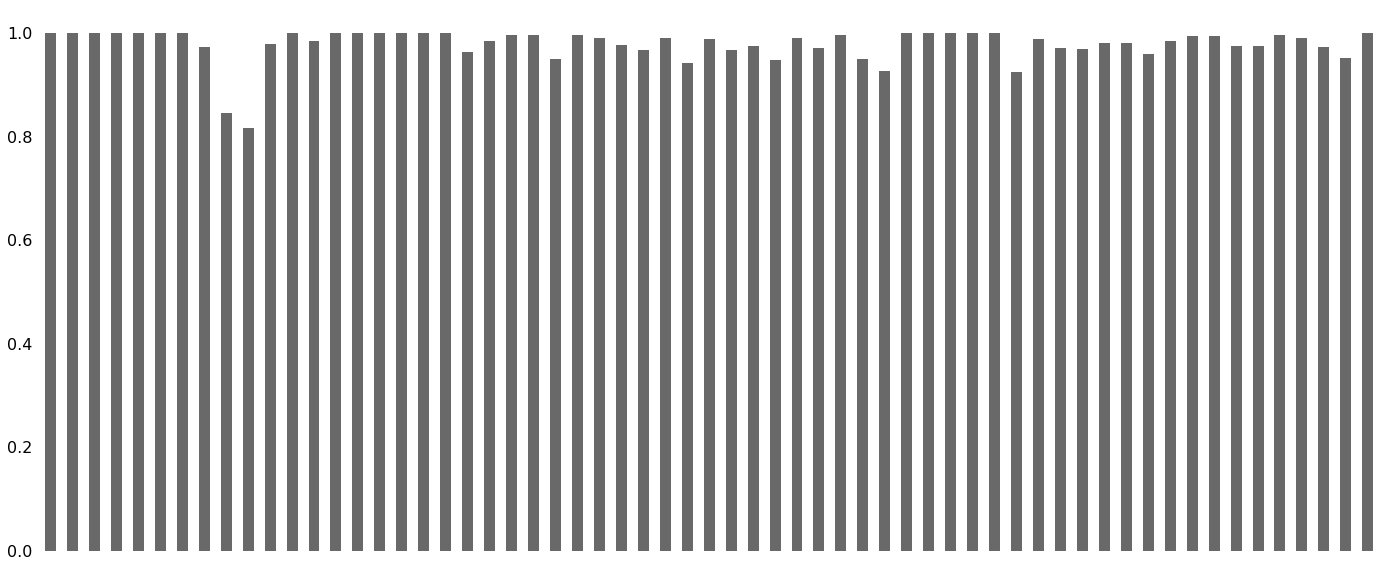

In [16]:
# lets visualize the missing values
msno.bar(news)
plt.show()

In [17]:
# checking out the missing values percentage
round(news.isna().sum()/len(news)*100,2)

id                                0.00
url                               0.00
n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
num_hrefs                         2.74
num_self_hrefs                   15.48
num_imgs                         18.33
num_videos                        2.02
average_token_length              0.00
num_keywords                      1.59
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.63
kw_max_min                        1.49
kw_avg_min                        0.28
kw_min_max                        0.43
kw_max_max                        5.09
kw_avg_max                        0.38
kw_min_avg               

In [18]:
# As the weekdays columns have missing values we can impute it from the date given in the URL column
news['Days']=news['url'].apply(lambda x: (pd.to_datetime(x[20:30]).strftime("%A")).lower())

In [19]:
# preparing the dummy variable for categorical column (Days)
weekday=pd.get_dummies(news['Days'],prefix='new_weekday_is')
weekday.head()

,new_weekday_is_friday,new_weekday_is_monday,new_weekday_is_saturday,new_weekday_is_sunday,new_weekday_is_thursday,new_weekday_is_tuesday,new_weekday_is_wednesday
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [20]:
# concatinating news and weekday data frame and dropping Days column
news = pd.concat([news,weekday],axis=1)
news.drop(['Days'],1,inplace=True)

In [21]:
# columns whose missing values should be imputed by col2 columns
col1=['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday']
col2=['new_weekday_is_monday','new_weekday_is_tuesday','new_weekday_is_wednesday','new_weekday_is_thursday','new_weekday_is_friday','new_weekday_is_saturday','new_weekday_is_sunday']

In [22]:
# using a for loop we will impute all the missing values in days columns with the values we derived from URL date
for i,j in zip(col1,col2):
    # making a data frame which has all the columns with missing values in the column
    df=news[news[i].isna()]
    # removing all the rows which has missing values in the column so that we can impute fresh values in later steps
    news=news[~news[i].isna()]
    df[i]=df[j]
    # imputing fresh values
    news=pd.concat([news,df],0)
    news.sort_values(by='id',inplace=True)    

In [23]:
# dropping the columns which we created using URL
news.drop(col2,1,inplace=True)

In [24]:
# we will impute all the missing values in is_weekend column with 1 if its saturday or sunday else 0
df=news[news['is_weekend'].isna()]
news=news[~news['is_weekend'].isna()]
df['is_weekend']=df['weekday_is_saturday']+df['weekday_is_sunday']
news=pd.concat([news,df],0)
news.sort_values(by='id',inplace=True) 

In [25]:
news.shape

(39644, 61)

In [26]:
miss=['kw_min_min','global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words'
      ,'rate_positive_words','rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity',
      'avg_negative_polarity','min_negative_polarity','max_negative_polarity','title_subjectivity','title_sentiment_polarity',
      'abs_title_subjectivity','abs_title_sentiment_polarity','kw_min_min','kw_max_min','kw_avg_min','kw_min_max','kw_max_max',
      'kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares','self_reference_max_shares',
      'self_reference_avg_sharess','num_keywords','num_hrefs','num_videos','num_imgs','num_self_hrefs']

In [27]:
# checking for values of all the column to see if there is any column with unacceptable values
for i in miss:
    print(news[i].value_counts(normalize=True))

-1.0      0.580138
 4.0      0.300081
 217.0    0.116823
 0.0      0.001963
 47.0     0.000157
 57.0     0.000105
 86.0     0.000105
 82.0     0.000079
 63.0     0.000052
 294.0    0.000052
 88.0     0.000052
 98.0     0.000026
 129.0    0.000026
 97.0     0.000026
 65.0     0.000026
 184.0    0.000026
 80.0     0.000026
 318.0    0.000026
 116.0    0.000026
 138.0    0.000026
 201.0    0.000026
 45.0     0.000026
 377.0    0.000026
 42.0     0.000026
 41.0     0.000026
 162.0    0.000026
Name: kw_min_min, dtype: float64
0.000000    0.029608
0.500000    0.000955
0.550000    0.000655
0.600000    0.000628
0.516667    0.000628
              ...   
0.393264    0.000027
0.375649    0.000027
0.369182    0.000027
0.542995    0.000027
0.465915    0.000027
Name: global_subjectivity, Length: 32061, dtype: float64
0.000000    0.030131
0.150000    0.000740
0.250000    0.000714
0.100000    0.000638
0.166667    0.000638
              ...   
0.043120    0.000026
0.072099    0.000026
0.094722    0.000

In [28]:
# kw_min_min has 58% values as -1 which is not relevant for no of shares so this might be indicating that no of share for this 
# keyword might not be available and we have 58 % + missing % of data in this field which is missing so we can drop it.
# dropping 'kw_min_min' column
news.drop(['kw_min_min','url'],1,inplace=True)

In [29]:
news1=news.copy()

In [30]:
# now we will impute all the missing values using MICE
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
lr=LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=30,verbose=1, imputation_order='roman',random_state=0)
news=imp.fit_transform(news)

[IterativeImputer] Completing matrix with shape (39644, 59)
[IterativeImputer] Change: 2232316.5963993776, scaled tolerance: 843.3000000000001 
[IterativeImputer] Change: 149560.42806798953, scaled tolerance: 843.3000000000001 
[IterativeImputer] Change: 54554.99990253094, scaled tolerance: 843.3000000000001 
[IterativeImputer] Change: 45559.60762607859, scaled tolerance: 843.3000000000001 
[IterativeImputer] Change: 34954.389250530396, scaled tolerance: 843.3000000000001 
[IterativeImputer] Change: 26651.55275953404, scaled tolerance: 843.3000000000001 
[IterativeImputer] Change: 20318.520714420592, scaled tolerance: 843.3000000000001 
[IterativeImputer] Change: 15491.735662187624, scaled tolerance: 843.3000000000001 
[IterativeImputer] Change: 11812.333809113537, scaled tolerance: 843.3000000000001 
[IterativeImputer] Change: 9007.190056814405, scaled tolerance: 843.3000000000001 
[IterativeImputer] Change: 6868.385228856874, scaled tolerance: 843.3000000000001 
[IterativeImputer] Ch

In [31]:
# converting numpy array to data frame 
news=pd.DataFrame(news,columns=news1.columns)

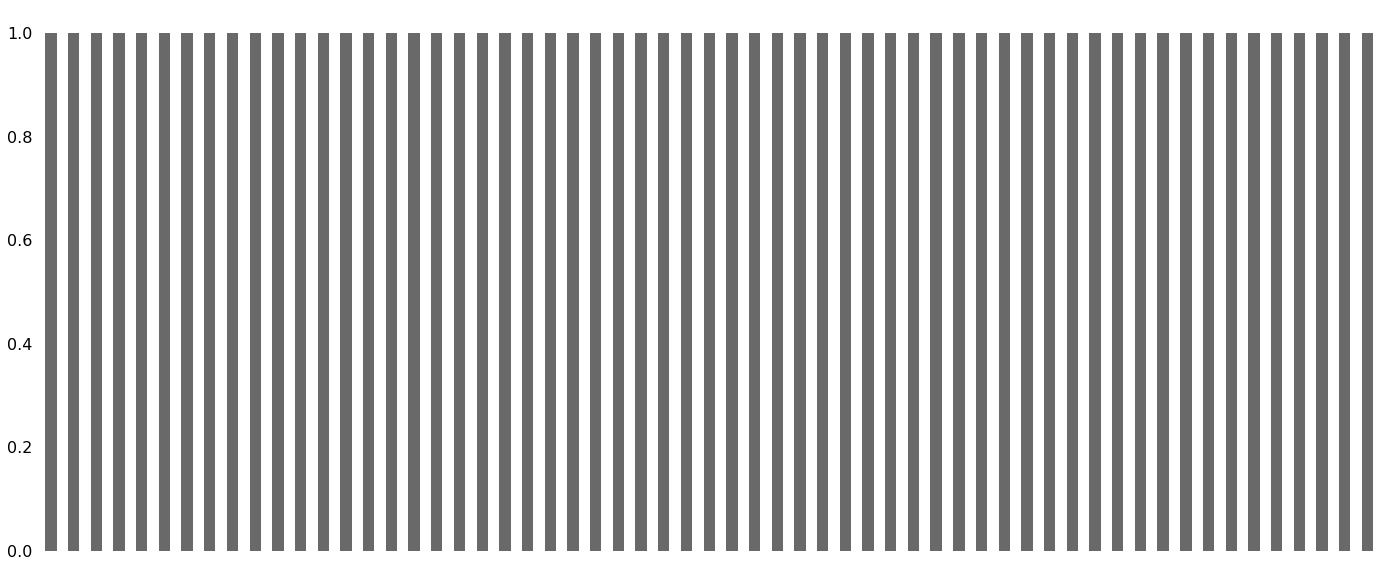

In [32]:
# lets visualize the missing values again
msno.bar(news)
plt.show()

#### We have handled the missing values. 

#### outlier handling 

In [33]:
# columns whose outlier analysis has to be done
outlier=['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity','num_imgs','num_self_hrefs']

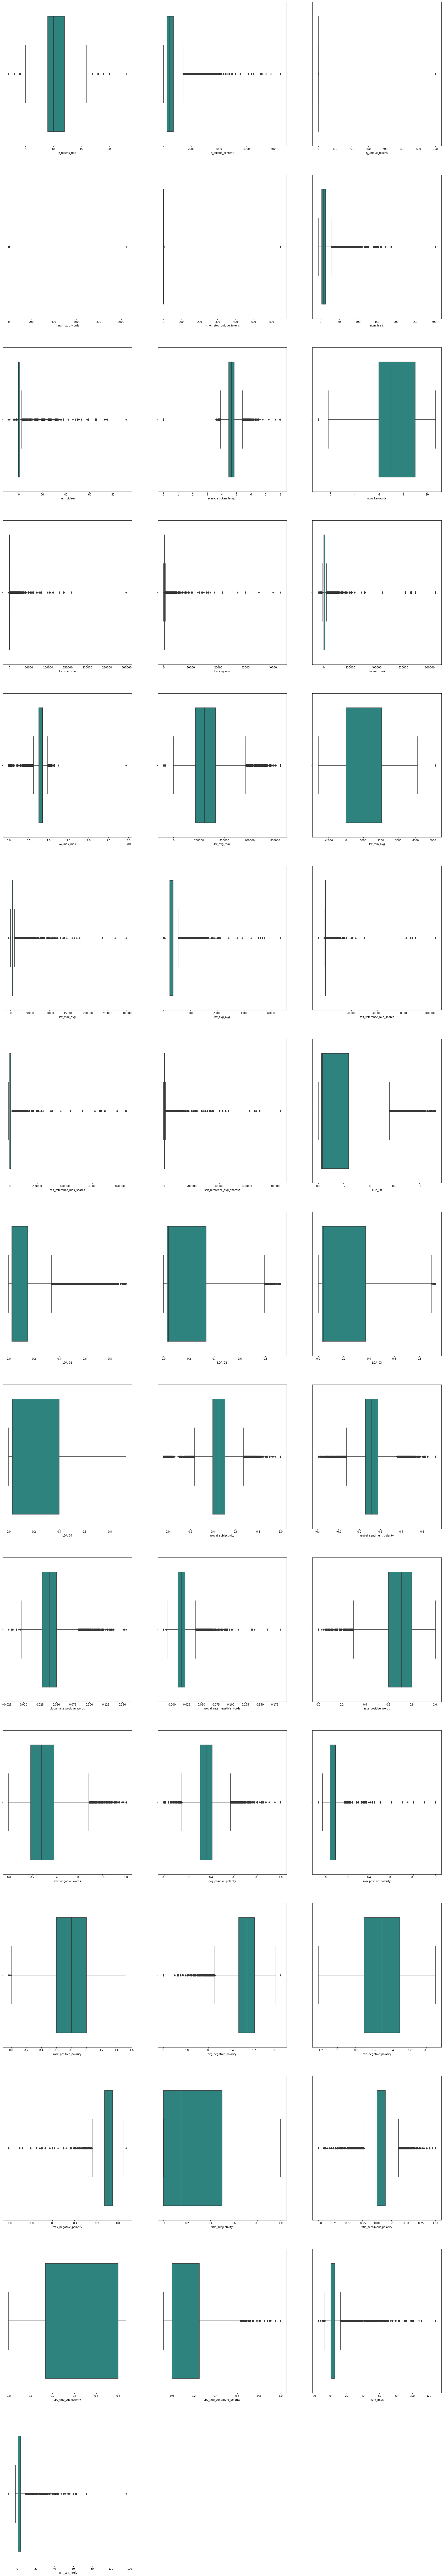

In [34]:
# Making box plot for the data
plt.figure(figsize = (30,180))
feature = outlier
for i in enumerate(feature):
    plt.subplot(15,3, i[0]+1)
    sns.boxplot(news[i[1]],palette='viridis')

In [35]:
# Capping the data
for col in outlier:
    upper_limit = news[col].mean() + (3*news[col].std())
    lower_limit = news[col].mean() - (3*news[col].std())
    # capping upper bound 
    news[col][news[col]<lower_limit] = lower_limit
    # capping Lower bound
    news[col][news[col]>upper_limit] = upper_limit

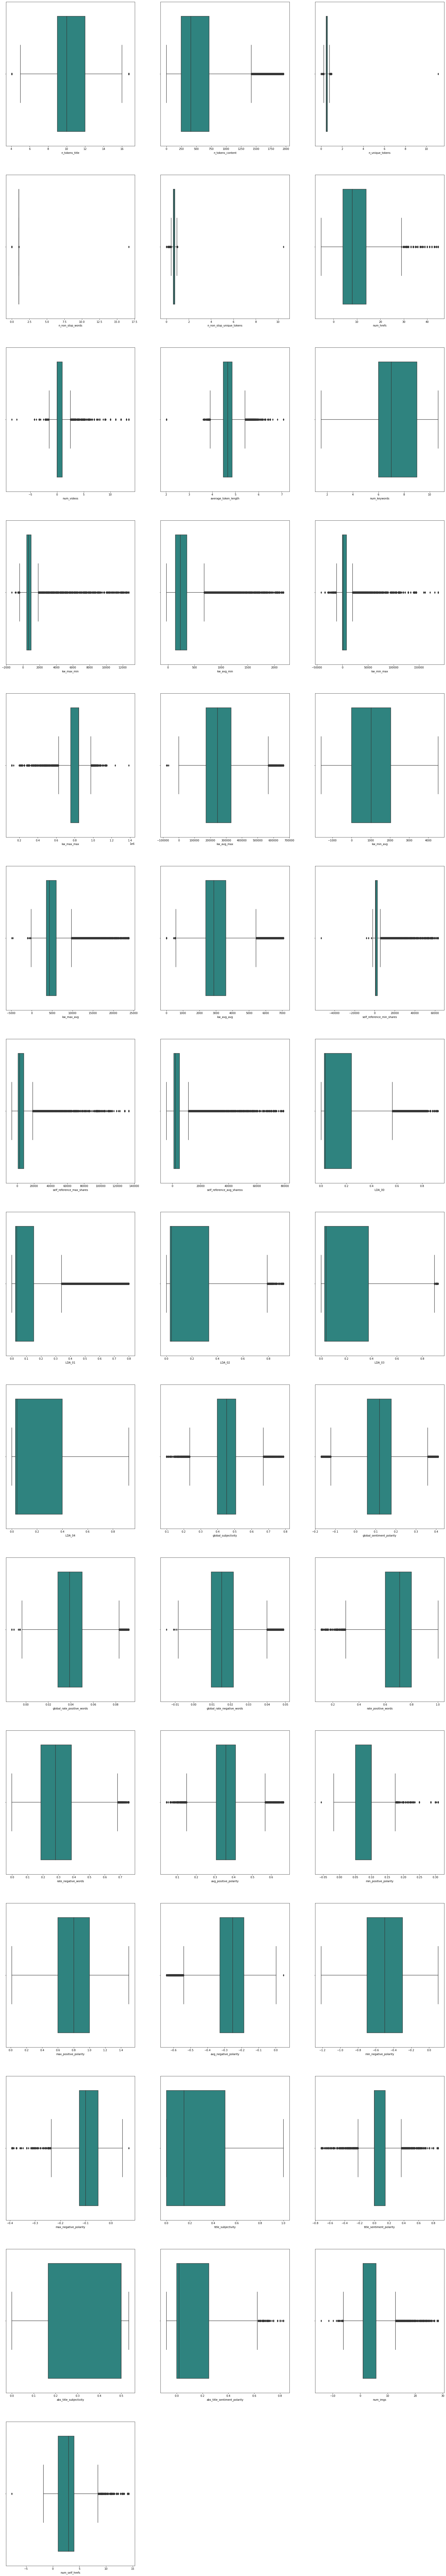

In [36]:
# plotting the data again to check if outliers are handled
plt.figure(figsize = (30,180))
feature = outlier
for i in enumerate(feature):
    plt.subplot(15,3, i[0]+1)
    sns.boxplot(news[i[1]],palette='viridis')

####  Looks like outliers are handled

#### Data type handling 

In [37]:
news.head()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.0,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.000000,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,2300.0,797.714286,0.0,617900.000000,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.000000,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,-0.087421,-0.100000,1.000000,0.600000,0.500000,0.600000,36700.0
1,1.0,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,13.487105,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,768.0,259.400000,0.0,564053.878378,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.000000,4477.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,0.011568,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.500000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200.0
2,2.0,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.000000,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,1100.0,472.625000,4800.0,843300.000000,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,4273.923363,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,0.614913,0.384615,0.354545,0.050000,1.0,-0.260833,-0.500000,-0.166667,0.000000,0.000000,0.500000,0.000000,945.0
3,3.0,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.000000,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,447.0,150.400000,0.0,843300.000000,229728.571429,0.000000,3504.933802,2366.267346,0.0,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.250000,-0.100000,0.000000,0.000000,0.500000,0.000000,844.0
4,4.0,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.000000,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1200.0,299.250000,33100.0,843300.000000,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.000000,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.312500,-0.100000,0.383333,0.166667,0.116667,0.166667,551.0


In [38]:
# all the count type column should be of the type int
count_col=['id','n_tokens_title','n_tokens_content','num_hrefs',
'num_self_hrefs',
'num_imgs',
'num_videos','kw_max_min','kw_avg_min',
'kw_min_max','kw_max_max','kw_avg_max',
'kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world'
,'self_reference_max_shares','self_reference_avg_sharess','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend',
'shares'
]

In [39]:
# changing dtype of columns to int
for i in count_col:
    news[i]=news[i].astype(int)

In [40]:
# checking dtypes after handling them
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             39644 non-null  int32  
 1   n_tokens_title                 39644 non-null  int32  
 2   n_tokens_content               39644 non-null  int32  
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      39644 non-null  int32  
 7   num_self_hrefs                 39644 non-null  int32  
 8   num_imgs                       39644 non-null  int32  
 9   num_videos                     39644 non-null  int32  
 10  average_token_length           39644 non-null  float64
 11  num_keywords                   39644 non-null  int32  
 12  data_channel_is_lifestyle      39644 non-null 

In [41]:
# count type columns whose min value cannot be negative
non_neg_col=['n_tokens_title','n_tokens_content','num_hrefs',
'num_self_hrefs',
'num_imgs',
'num_videos','kw_max_min','kw_avg_min',
'kw_min_max','kw_max_max','kw_avg_max',
'kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares','num_keywords'
,'self_reference_max_shares','self_reference_avg_sharess']

In [42]:
# all the number or count type columns must have values >=0 and due to missing value handling using MICE we got negative values
# so lets round all the negative values to 0
for i in non_neg_col:
    news[news[i]<0][i]=0

### Step 3 : EDA and Data Modifications

In [43]:
# making a copy of the data frame as it can be useful later
news1=news.copy()

In [44]:
# let's divide test and train set
# dividing train and test set
news_test=news.iloc[news[news['id']==29733].index[0]:news[news['id']==39643].index[0]+1,:]
news_train=news.iloc[news[news['id']==0].index[0]:news[news['id']==29733].index[0],:]

print(news_test.shape)
print(news_train.shape)

(9911, 59)
(29733, 59)


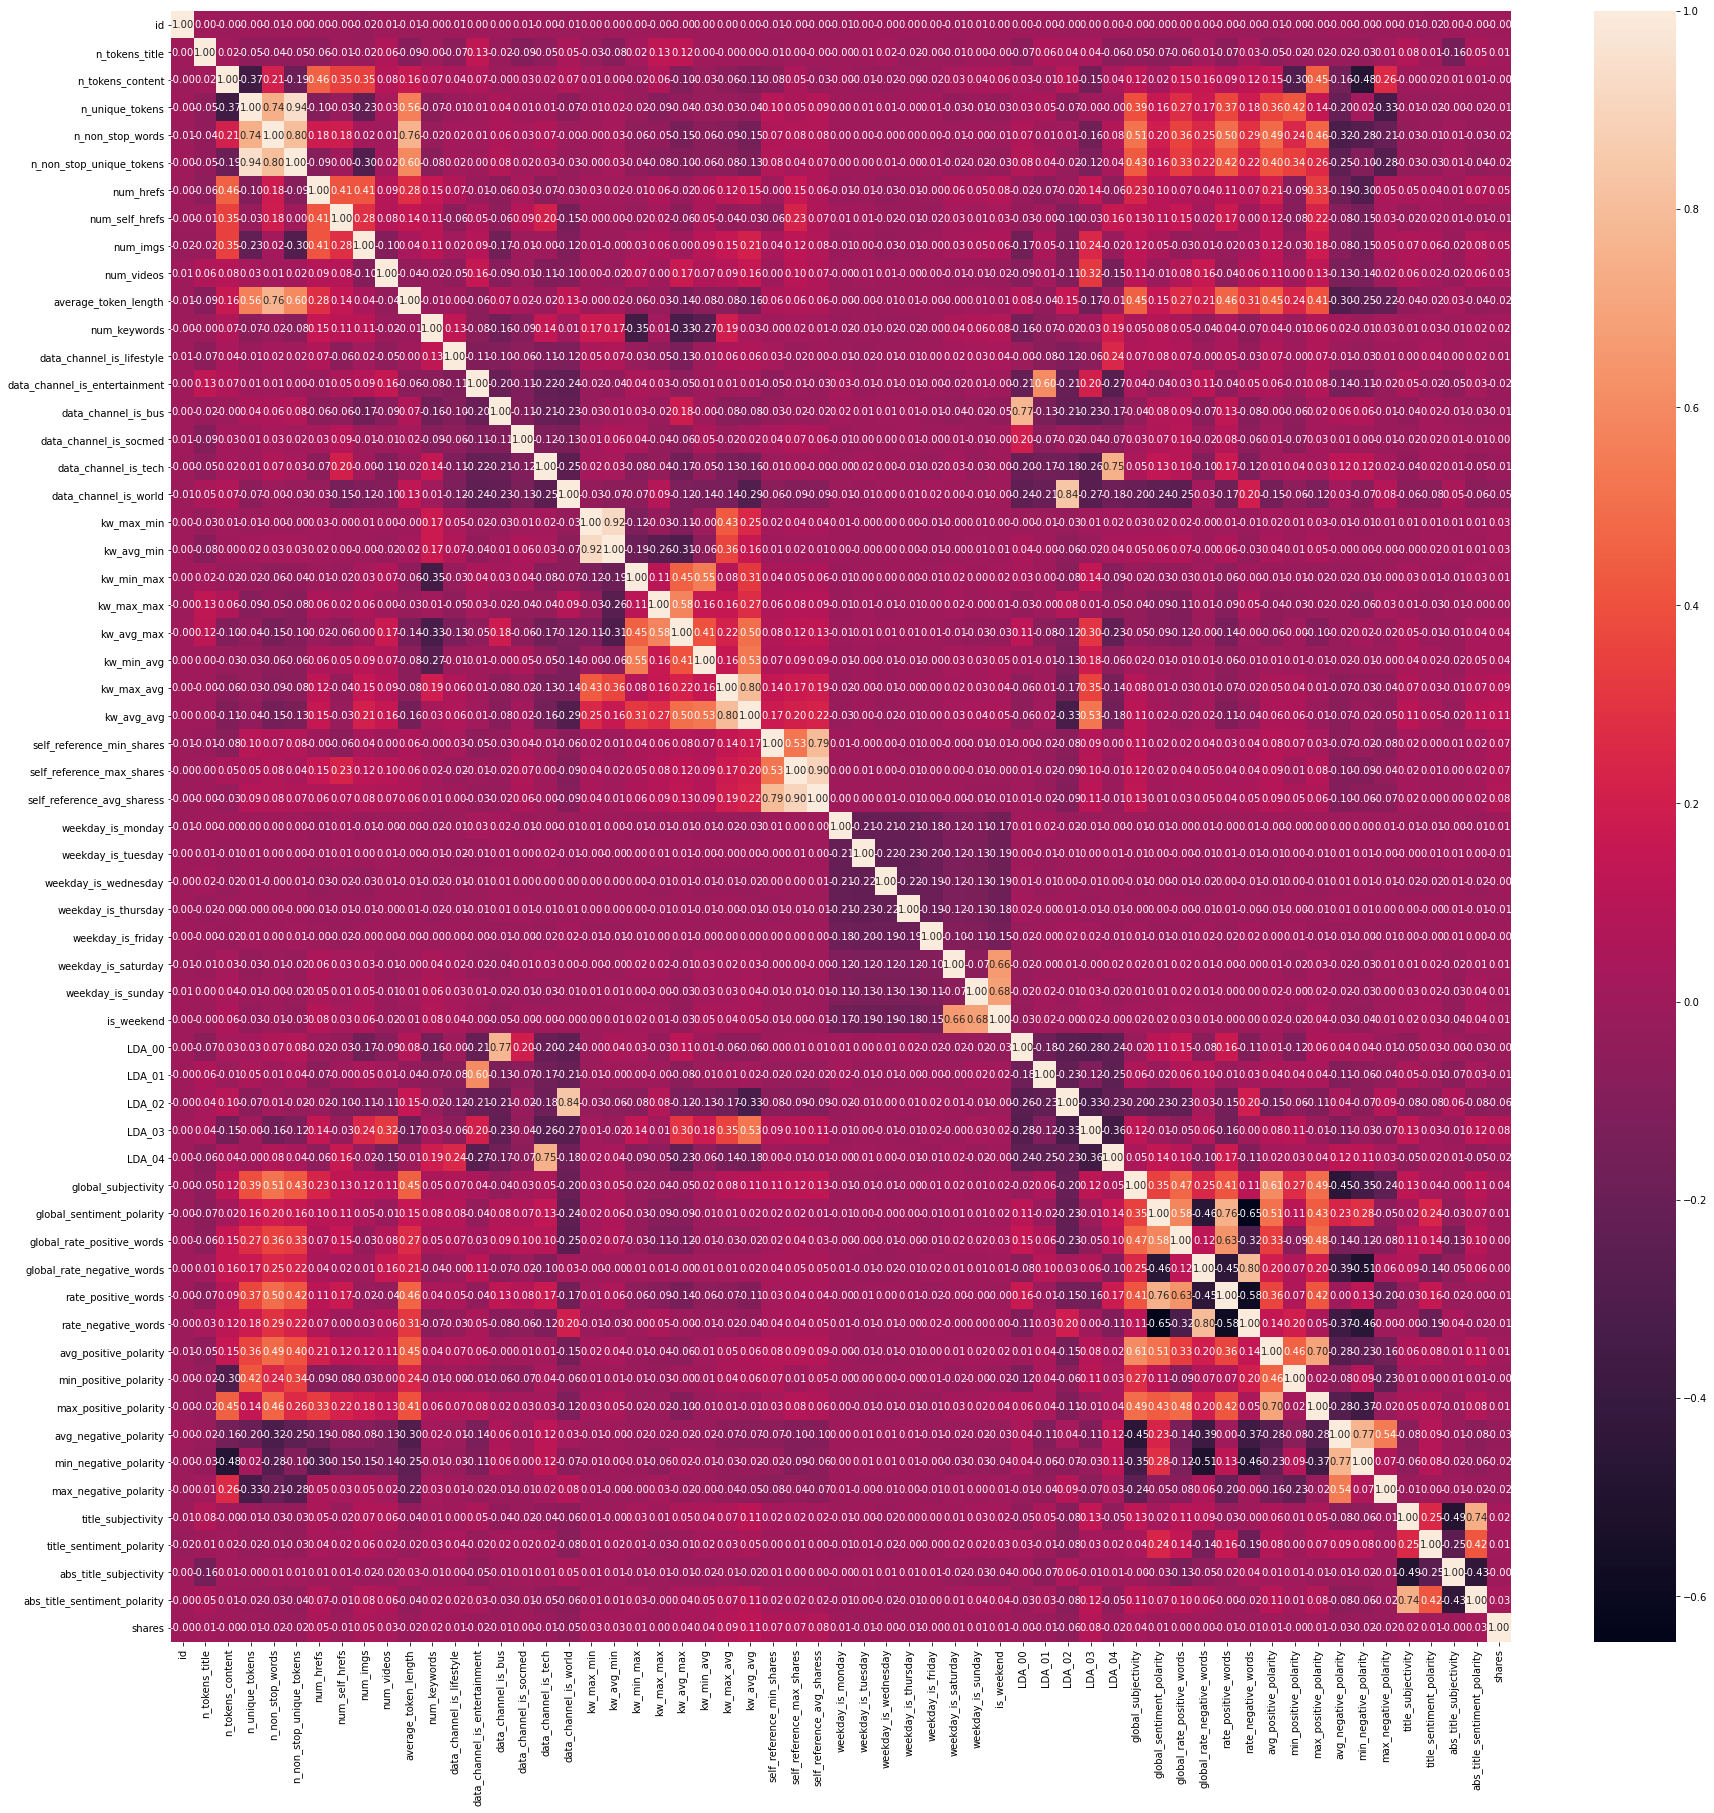

In [45]:
# let's plot heat map of train data frame
plt.figure(figsize=[30,30])
sns.heatmap(news_train.corr(),annot=True,fmt='.2f')
plt.show()

#### Columns with 80% or more correlation :
- self_reference_max_shares	and self_reference_avg_sharess
- kw_max_min and kw_avg_min
- n_unique_tokens and n_non_stop_unique_tokens and n_non_stop_words
- global_rate_negative_words and rate_negative_words
- LDA_02 and data_channel_is_world
- kw_max_avg and kw_avg_avg

In [46]:
# dropping columns which makes less business scence of the two correlated column
news_train.drop(['id','self_reference_max_shares','kw_max_min','n_non_stop_words','n_unique_tokens'
           ,'rate_negative_words','LDA_02','kw_max_avg'],1,inplace=True)
news_test.drop(['id','self_reference_max_shares','kw_max_min','n_non_stop_words','n_unique_tokens'
           ,'rate_negative_words','LDA_02','kw_max_avg'],1,inplace=True)

In [47]:
news.drop(['self_reference_max_shares','kw_max_min','n_non_stop_words','n_unique_tokens'
           ,'rate_negative_words','LDA_02','kw_max_avg'],1,inplace=True)

In [48]:
# we will make a data frame which shows the correlation of churn_probability column and all other column
df=pd.DataFrame(news_train.corr(method='spearman')['shares'][:-1])

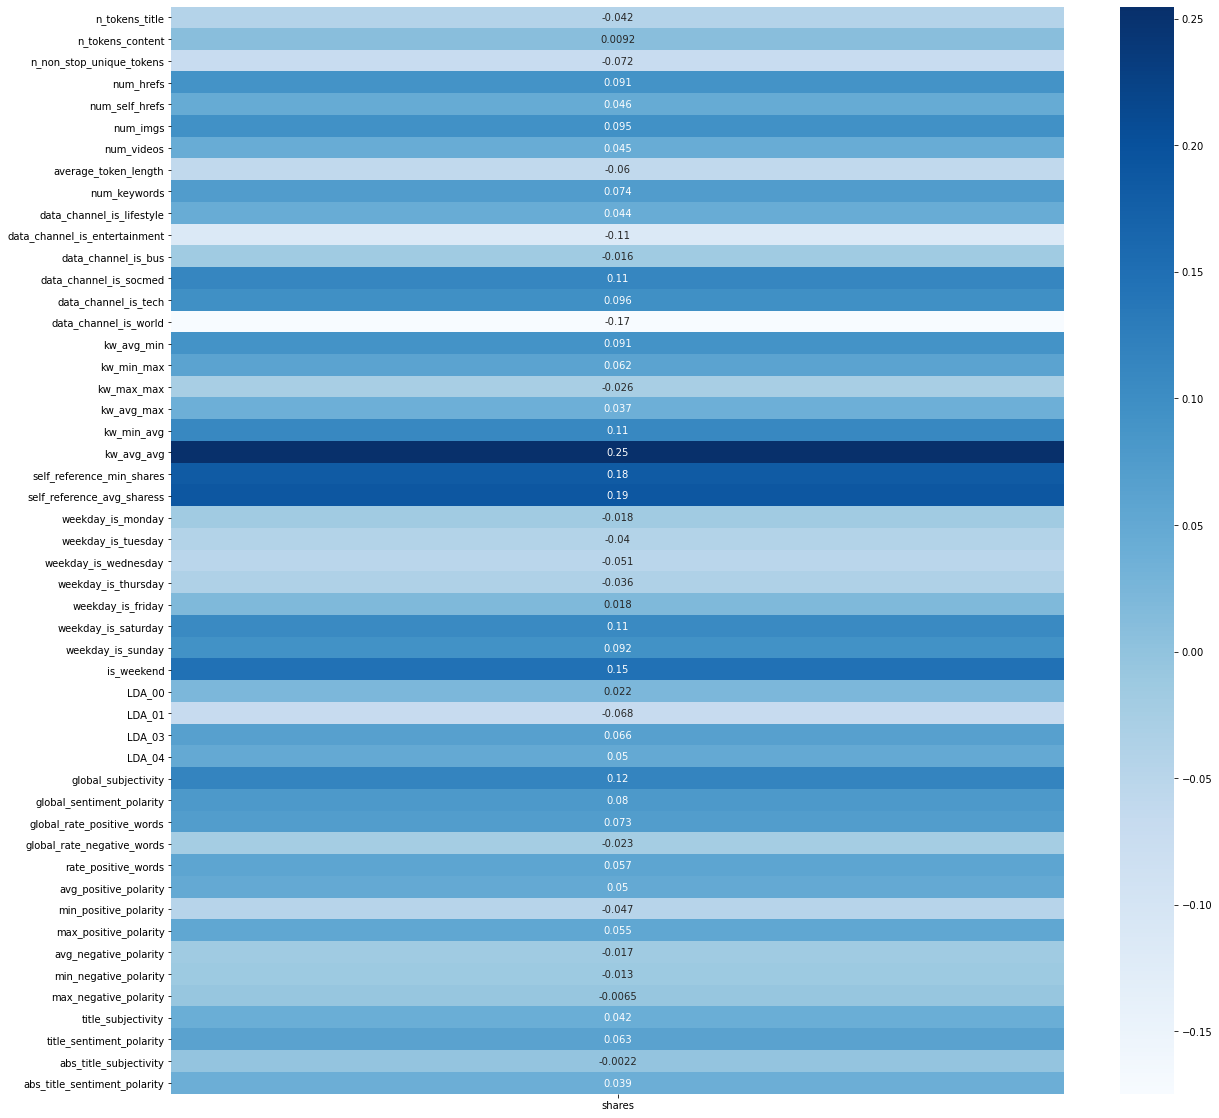

In [49]:
# heatmap of shares column with all other column to see which columns have high correlation.
plt.figure(figsize=[20,20])
sns.heatmap(df, annot=True,cmap='Blues')
plt.show()

In [50]:
# general fuction for categorical variable analsys.
def num_cat(i):
    plt.figure(figsize=[15,6])
    plt.title('Median number of shares vs {}'.format(i))
    plt.xlabel(i)
    plt.ylabel('Median number of shares')
    ((news_train.groupby(i)['shares']).median()).plot(kind='bar')

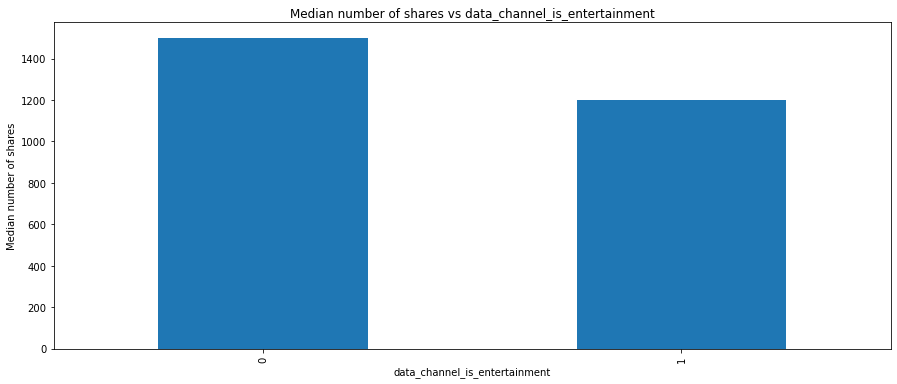

In [51]:
# categorical analysis of data_channel_is_entertainment column
num_cat('data_channel_is_entertainment')

#### Inference :
-  We can see that if data channel is for entertainment then number of shares will be less.

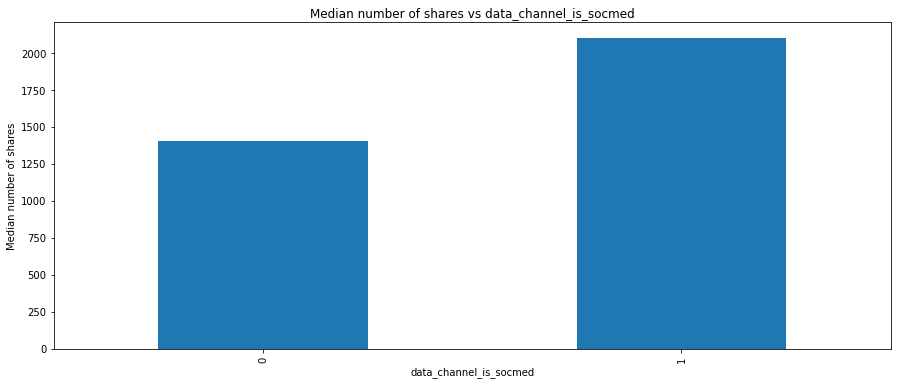

In [52]:
# categorical analysis of data_channel_is_socmed column
num_cat('data_channel_is_socmed')

#### Inference :
- If the channel of sharing is social media then number of sharing will be more compared to when its shared by other channels.

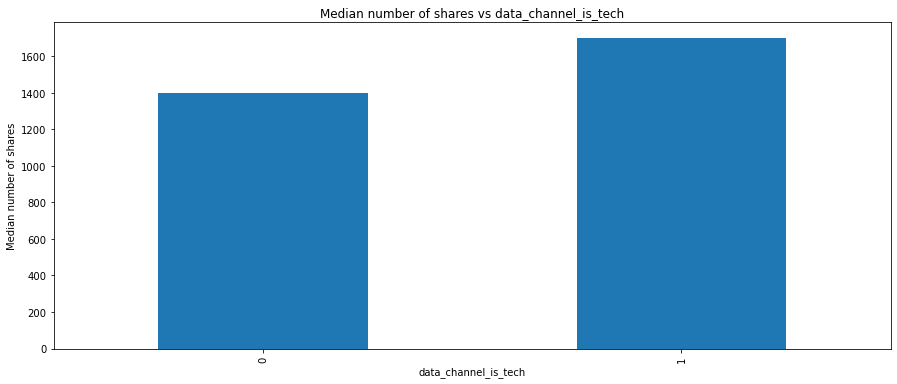

In [53]:
# categorical analysis of data_channel_is_socmed column
num_cat('data_channel_is_tech')

#### Inference :
- If news is shared on tech channel then the number of shares will increase compared to other channels.

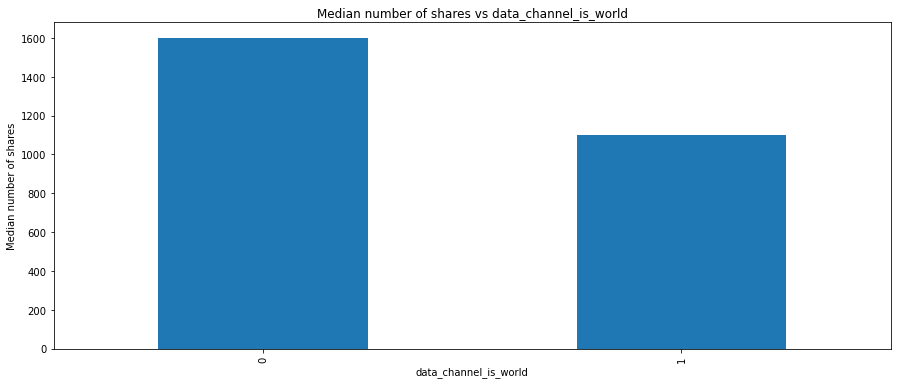

In [54]:
# categorical analysis of data_channel_is_socmed column
num_cat('data_channel_is_world')

#### Inference :
- If news is shared on world channel then it won't be shared well compared to other channels.

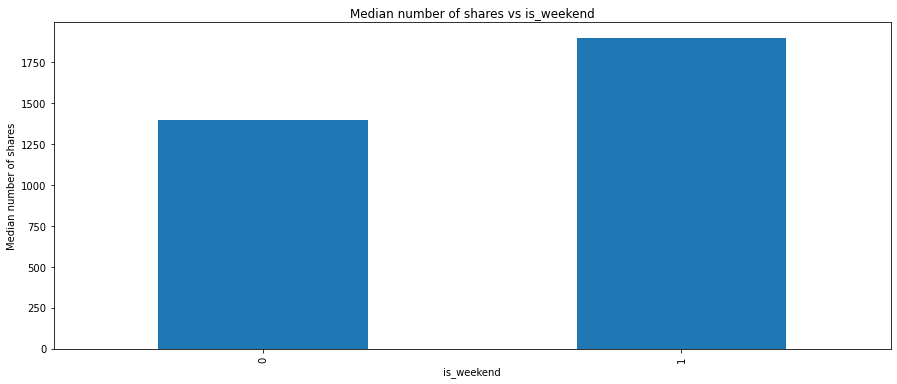

In [55]:
# categorical analysis of data_channel_is_socmed column
num_cat('is_weekend')

#### Inference :
- There is a clear pattern which shows that if news is shared on weekends then the share of news will be more.

In [56]:
# making bin for few numeric variables 
bin_labels= ['Low','Medium','High']
c=pd.DataFrame([pd.qcut(news_train['num_hrefs'],q=[0, 0.3, 0.6, 1],labels=bin_labels,duplicates='drop'),
                pd.qcut(news_train['num_imgs'],q=[0, 0.3, 0.6 , 1],labels=bin_labels,duplicates='drop'),
                pd.qcut(news_train['num_keywords'],q=[0, 0.3, 0.6 , 1],labels=bin_labels,duplicates='drop')
                ,news_train['shares']])
c=c.T
c['shares']=c['shares'].astype('int')

In [57]:
# categorical analysis general fn
def new_num_cat(i):
    plt.figure(figsize=[15,6])
    plt.title('Median number of shares vs {}'.format(i))
    plt.xlabel(i)
    plt.ylabel('Median number of shares')
    (c.groupby(i)['shares'].median()).plot(kind='bar')

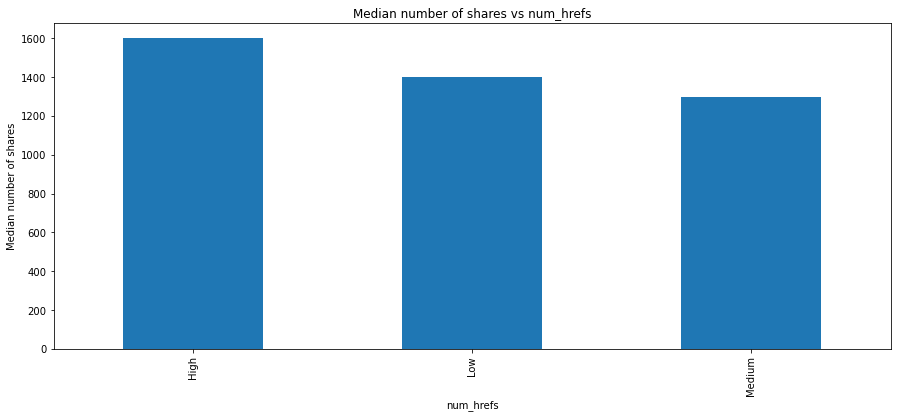

In [58]:
# analysing num_hrefs column
new_num_cat('num_hrefs')

#### Inference:
- We can see that as number of href increses, more is the number of shares.

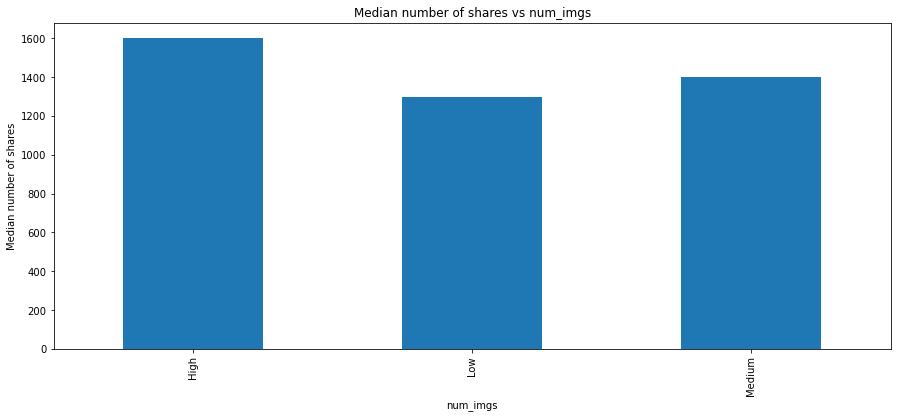

In [59]:
# analysing num_imgs column
new_num_cat('num_imgs')

#### Inference:
- We can see that as number of images increases, more is the number of shares.

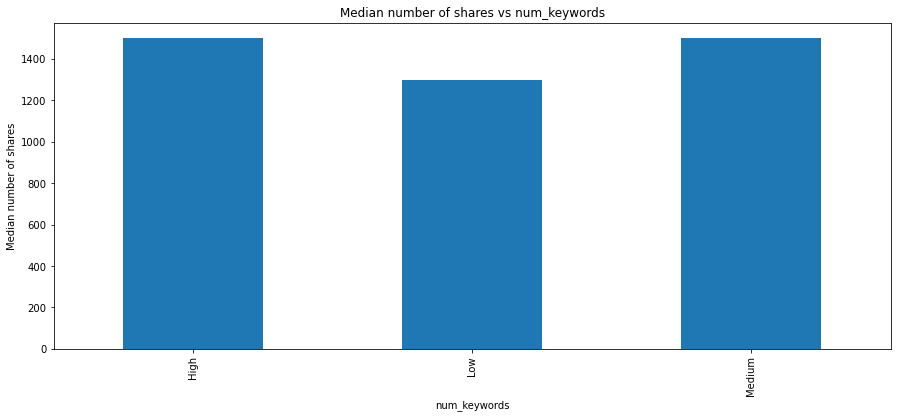

In [60]:
# analysing num_keywords column
new_num_cat('num_keywords')

#### Inference:
- We can see that as number of keywords increases, more is the number of shares.

In [61]:
# making copy of train data set
news_train_1=news_train.copy()

#### Inference :
- As 'kw_avg_avg','kw_avg_min','kw_min_avg','self_reference_min_shares','self_reference_avg_sharess','global_subjectivity' columns increases the sharing of news increses.
- We also saw that square of these columns are directly correlated with log of share column.

#### Numerical variable analysis 

#### We will plot all the numeric columns with log of share column as share column range is too large. 

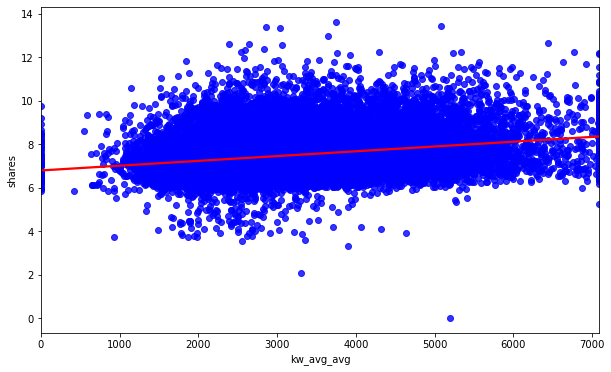

In [62]:
# analysing kw_avg_avg column
plt.figure(figsize = (10,6))
sns.regplot(x=news_train['kw_avg_avg'],y=np.log(news_train['shares']),scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

#### Inference:
- As the kw_avg_avg variable increases the shares of news also increases.

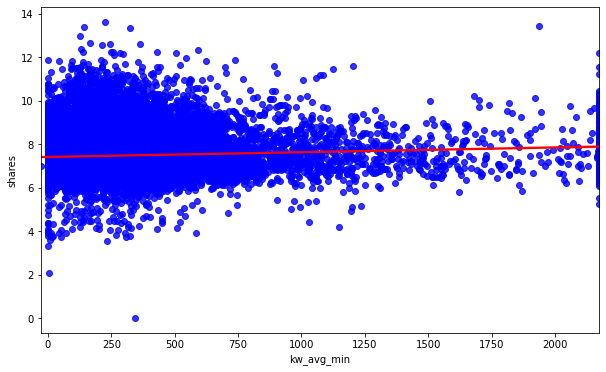

In [63]:
# analysing kw_avg_min column
plt.figure(figsize = (10,6))
sns.regplot(x=news_train['kw_avg_min'],y=np.log(news_train['shares']),scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

#### Inference:
- As the kw_avg_min variable increases the shares of news also increases.

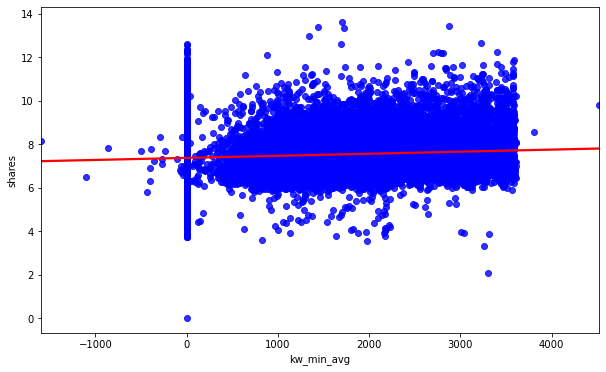

In [64]:
# analysing kw_min_avg column
plt.figure(figsize = (10,6))
sns.regplot(x=news_train['kw_min_avg'],y=np.log(news_train['shares']),scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

#### Inference:
- As the kw_min_avg variable increases the shares of news also increases.

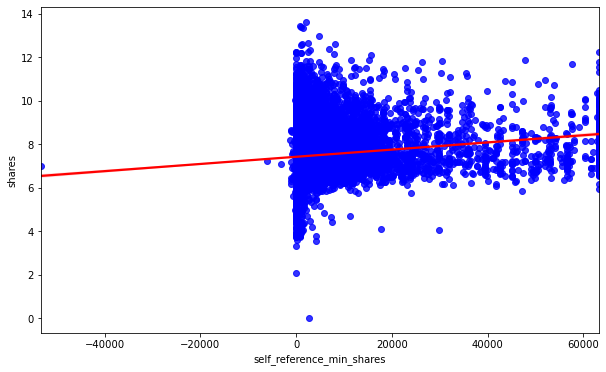

In [65]:
# analysing self_reference_min_shares column
plt.figure(figsize = (10,6))
sns.regplot(x=news_train['self_reference_min_shares'],y=np.log(news_train['shares']),scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

#### Inference:
- As the self_reference_min_shares variable increases the shares of news also increases.

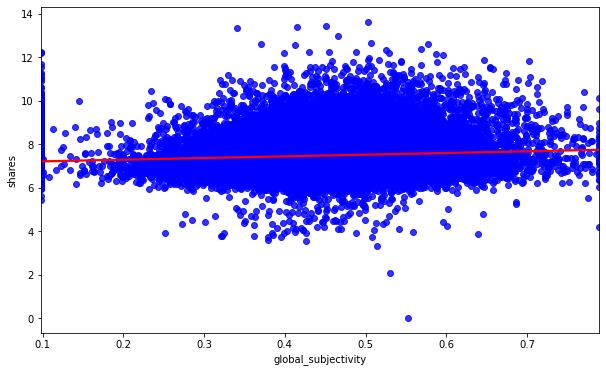

In [66]:
# analysing global_subjectivity column
plt.figure(figsize = (10,6))
sns.regplot(x=news_train[['global_subjectivity']],y=np.log(news_train['shares']),scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

#### Inference:
- As the global_subjectivity variable increases the shares of news also increases.

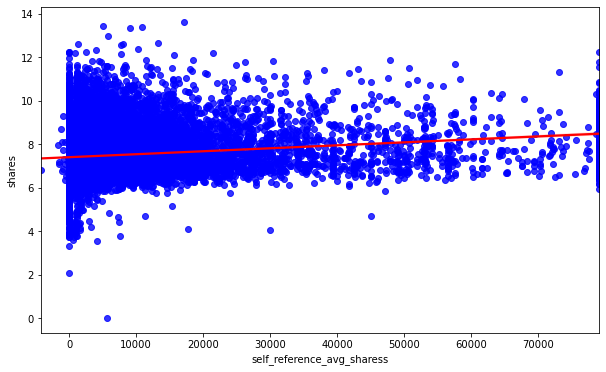

In [67]:
# analysing self_reference_avg_sharess column
plt.figure(figsize = (10,6))
sns.regplot(x=news_train['self_reference_avg_sharess'],y=np.log(news_train['shares']),scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

#### Inference:
- As the self_reference_avg_sharess variable increases the shares of news also increases.

In [68]:
# droping shares column from test data set as we dont need it now
news_test.drop(['shares'],1,inplace=True)

### Step - 4 : Preparing data for modeling 

In [69]:
# let's create X and y
y=news_train.pop('shares')
X=news_train

In [70]:
# checking if X is created properly
X.shape

(29733, 50)

In [71]:
# checking if y is created properly
y.shape

(29733,)

#### Standard Scaling the train and test data

In [72]:
col_list=list(X.columns)

In [73]:
# standard scaling the numerical variable
scaler = StandardScaler()
X[col_list] = scaler.fit_transform(X[col_list])
X.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_avg_avg,self_reference_min_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-1.138929,-0.781352,0.767846,-0.485815,-0.023617,-0.663110,-0.397677,0.003254,0.414990,-0.23579,-0.461088,-0.433632,-0.249011,2.098579,-0.521588,1.833125,-0.393607,-0.713682,-1.077628,-0.989189,-0.504002,-0.175090,-0.322462,-0.44881,-0.47938,-0.480812,-0.474652,2.447330,-0.256839,-0.270483,-0.387056,-0.607212,-0.535483,-0.671710,2.305782,1.918245,0.676761,-0.366580,-1.149789,1.062132,0.594015,0.114341,-0.628761,1.277098,1.495309,0.046966,2.216575,2.095951,0.844113,2.102484
1,0.759717,-0.285100,-0.057452,1.255211,1.452361,-0.504655,4.695721,0.742916,-0.110427,-0.23579,2.168784,-0.433632,-0.249011,-0.476513,-0.521588,-0.116836,-0.393607,-0.988270,-0.678280,-0.989189,-0.928578,-0.343515,-0.093494,-0.44881,-0.47938,2.079815,-0.474652,-0.408609,-0.256839,-0.270483,-0.387056,-0.054548,-0.516404,1.758278,-0.708388,0.030811,0.317538,-0.058419,-0.480458,0.643482,-0.298477,-1.006901,0.989556,0.237820,0.073203,0.416970,-0.870594,-0.280082,0.844113,-0.715434
2,-1.613590,-0.737778,0.444060,-0.159373,0.345378,-0.504655,-0.005877,0.417618,0.414990,-0.23579,-0.461088,-0.433632,-0.249011,2.098579,-0.521588,0.655175,-0.215113,0.435724,-0.409595,0.400223,-0.484449,0.176319,-0.063637,-0.44881,-0.47938,-0.480812,-0.474652,2.447330,-0.256839,-0.270483,-0.387056,-0.607130,-0.535515,-0.672985,2.307071,-0.883881,-0.024658,-0.264030,0.525817,-0.389671,0.001600,-0.726591,0.989556,-0.022461,0.073203,-0.816378,-0.870594,-0.280082,0.844113,-0.715434
3,-0.664267,-0.147118,0.482355,-0.377001,-1.130600,-0.504655,-0.005877,0.054551,-0.110427,-0.23579,-0.461088,-0.433632,-0.249011,2.098579,-0.521588,-0.511902,-0.393607,0.435724,-0.222606,-0.989189,-0.692082,-0.426096,-0.507337,-0.44881,-0.47938,2.079815,-0.474652,-0.408609,-0.256839,-0.270483,-0.387056,-0.593749,-0.518762,-0.192509,1.779299,0.980459,1.434250,1.520079,-0.578193,0.984605,0.018780,0.725929,-0.224182,0.731687,0.934921,0.046966,-0.870594,-0.280082,0.844113,-0.715434
4,1.234378,1.363423,0.019756,-0.050559,0.345378,1.555262,-0.397677,0.136220,-1.686678,-0.23579,2.168784,-0.433632,-0.249011,-0.476513,-0.521588,0.028143,0.837260,0.435724,0.920747,1.500284,0.520194,-0.250391,-0.322462,-0.44881,-0.47938,-0.480812,2.106806,-0.408609,-0.256839,-0.270483,-0.387056,-0.512632,-0.406649,1.943704,-0.634106,-0.090362,0.400971,0.090784,-0.631464,0.663418,0.119394,-1.006901,0.989556,0.524174,0.719491,0.046966,0.312821,0.379927,-1.208518,0.067321


In [74]:
# Standard scaling test data set
news_test[col_list] = scaler.transform(news_test[col_list])

In [75]:
# checking news_test data frame
news_test.head()

,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_avg_avg,self_reference_min_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
29733,-0.189606,0.073169,-0.215873,1.146397,-0.761605,-0.663110,0.777723,0.220169,-1.161261,-0.23579,-0.461088,-0.433632,-0.249011,-0.476513,1.917221,-0.591641,0.487709,0.435724,0.611653,0.910997,-0.107359,-0.137439,-0.294731,2.228114,-0.47938,-0.480812,-0.474652,-0.408609,-0.256839,-0.270483,-0.387056,-0.550508,-0.464408,-0.622051,-0.668817,-0.035576,-0.690931,-0.129977,0.297383,-0.158930,-0.856773,-0.516358,-0.628761,-0.045110,-0.616171,0.046966,2.216575,-0.280082,0.844113,-0.715434
29734,0.759717,1.436045,-0.311290,-0.050559,1.083366,1.079897,-0.397677,-0.454444,0.414990,-0.23579,-0.461088,-0.433632,-0.249011,2.098579,-0.521588,-0.134958,-0.159333,0.435724,-0.894229,0.484911,-0.377374,0.013165,-0.054393,-0.448810,-0.47938,-0.480812,2.106806,-0.408609,-0.256839,-0.270483,-0.387056,-0.607106,-0.535517,-0.672986,2.307042,-0.199028,0.434486,0.182306,-0.222761,0.364382,0.669353,-1.006901,0.989556,0.118882,-0.665412,0.742732,-0.870594,-0.280082,0.844113,-0.715434
29735,-0.189606,-0.323832,0.155587,-1.029886,-1.130600,-0.504655,-0.005877,0.297439,-0.110427,-0.23579,2.168784,-0.433632,-0.249011,-0.476513,-0.521588,-0.029849,-0.140740,0.435724,-0.700817,0.623411,-0.432308,-0.426096,-0.507337,-0.448810,-0.47938,2.079815,-0.474652,-0.408609,-0.256839,-0.270483,-0.387056,-0.593783,3.133052,-0.660727,-0.708389,0.975786,-1.135567,0.468481,1.571281,-0.507805,-0.423514,0.725929,-1.033341,-0.781789,-0.960858,-0.600542,-0.870594,-0.280082,0.844113,-0.715434
29736,0.759717,0.639622,-0.363124,-0.921072,-0.392611,-0.187745,-0.005877,-1.151591,0.940407,-0.23579,2.168784,-0.433632,-0.249011,-0.476513,-0.521588,-0.026224,-0.326672,0.435724,0.495527,-0.054975,0.797658,0.364574,0.075019,-0.448810,-0.47938,-0.480812,2.106806,-0.408609,-0.256839,-0.270483,-0.387056,-0.617820,1.690132,0.725597,-0.730361,0.873122,-0.957983,0.475421,1.702095,-0.557794,0.052952,0.725929,0.989556,-0.847269,-1.650232,0.694474,-0.870594,-0.280082,0.844113,-0.715434
29737,0.285055,1.152818,-0.371147,2.343352,-0.392611,-0.504655,-0.397677,1.068728,0.414990,-0.23579,-0.461088,-0.433632,-0.249011,-0.476513,1.917221,-0.725746,-0.393607,0.435724,-0.339730,-0.989189,-1.004927,-0.237841,-0.368680,-0.448810,-0.47938,-0.480812,-0.474652,-0.408609,-0.256839,3.697090,2.583605,-0.605275,-0.535485,-0.672643,-0.720743,-0.319055,-0.156733,-0.799877,-0.255656,-0.193817,0.217332,0.114341,0.180397,-0.050357,0.073203,-0.200688,-0.870594,-0.280082,0.844113,-0.715434


### Step - 5 : Model Building 

####  Making a base model ( To understand the most important features for prediction)

#### During EDA we observed that log (y) was giving better linear relation with the indipendent variable.

In [76]:
# transforming shares column by taking log of the column
y_log=np.log(y)

#### Let's Make a base model using Lasso as it will do feature selection and will be good for interpretation of important variable. 

In [77]:
# Making a lasso model to do feature selection 
lassoreg = Lasso(alpha = 0.03)
lassoreg.fit(X, y_log)
y_pred = lassoreg.predict(X)
print("r2 score = " + str(r2_score(y_log, y_pred)))

r2 score = 0.10940359504566044


#### Lets see what all features got selected 

In [78]:
# making list of all the columns
col=list(X.columns)

In [79]:
# making list of columns which are been selected by lasso 
selected_col=[]
selected_dict={}
for i,j in zip(col,lassoreg.coef_):
    if j!=0 :
        selected_col.append(i)
        selected_dict[i]=round(j,4)

In [80]:
# list of selected cols
selected_col

['num_hrefs',
 'num_imgs',
 'average_token_length',
 'num_keywords',
 'data_channel_is_entertainment',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_max_max',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_avg_sharess',
 'is_weekend',
 'global_subjectivity',
 'title_sentiment_polarity']

In [81]:
# making a dataframe of top 15 most important columns for news share prediction 
df=pd.DataFrame(index=selected_col,data=selected_dict.values(),columns=['Coef'])

In [82]:
# sorting the value of the columns based on the decending order of there coefficients
df.sort_values(by='Coef',ascending=False,inplace=True)

In [83]:
# let's see the most important 15 features for news share prediction
df

,Coef
kw_avg_avg,0.1724
is_weekend,0.0575
self_reference_avg_sharess,0.0492
num_hrefs,0.0313
data_channel_is_tech,0.0277
self_reference_min_shares,0.0271
data_channel_is_socmed,0.0265
num_imgs,0.0149
num_keywords,0.0116
title_sentiment_polarity,0.0032


####  We can see that these features are contributing most to explain news share prediction.

#### Lets make a model using Ridge Regression 

In [84]:
# Select best alpha using Grid search cv
Ridgereg = Ridge()
hyper_params = {'alpha':[100,200,300,500,800,1000]}
model_rf = GridSearchCV(estimator=Ridgereg, 
                              param_grid=hyper_params,
                              verbose=1,
                              cv=3,
                              n_jobs=-1)
model_rf.fit(X, y_log)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [100, 200, 300, 500, 800, 1000]}, verbose=1)

In [85]:
# checking best parameter for the model and best score
print(model_rf.best_score_)
print(model_rf.best_estimator_)

0.12710694436841477
Ridge(alpha=300)


#### Lets make a model using Polynomial Regression 

In [86]:
# making polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X[selected_col])
poly_features.shape

(29733, 136)

In [87]:
# Select best alpha using Grid search cv
Ridgereg = Ridge()
hyper_params = {'alpha':[1,100,200,300,500,800,1000]}
model_rf = GridSearchCV(estimator=Ridgereg, 
                              param_grid=hyper_params,
                              verbose=1,
                              cv=3,
                              n_jobs=-1)
model_rf.fit(poly_features, y_log)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 100, 200, 300, 500, 800, 1000]},
             verbose=1)

In [88]:
# checking best parameter for the model and best score
print(model_rf.best_score_)
print(model_rf.best_estimator_)

0.1320165206667513
Ridge(alpha=1000)


#### After doing trail and error we found out that Random forest is giving better results compared to XGBoost 

In [89]:
# Making random forest model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

<IPython.core.display.Javascript object>

In [90]:
# after trail and error found that this is the best hyperparameter 

hyper_params = {'n_estimators': [220],
                'max_depth' : [9],
                'min_samples_split' : [4],
                'max_features' : [21] }
                    
model_rf = GridSearchCV(estimator=rf, 
                              param_grid=hyper_params,
                              verbose=1,
                              cv=4,
                              return_train_score=True,
                              n_jobs=-1)
model_rf.fit(X, y)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [9], 'max_features': [21],
                         'min_samples_split': [4], 'n_estimators': [220]},
             return_train_score=True, verbose=1)

In [91]:
#checking r2 score
y_pred_rf = model_rf.predict(X)
r2_score(y, y_pred_rf)

0.625386123455586

In [92]:
# checking RMSE score
mse = mean_squared_error(y, y_pred_rf)
print(mse)
rmse = mse**0.5
print(rmse)

55866519.78905587
7474.390930975973


In [93]:
# making random forest model with the attained hyperparameter tuning
rf = RandomForestRegressor(random_state=42, n_jobs=-1,n_estimators=220,max_depth=9,min_samples_split=4,max_features=21)
rf.fit(X, y)

<IPython.core.display.Javascript object>

RandomForestRegressor(max_depth=9, max_features=21, min_samples_split=4,
                      n_estimators=220, n_jobs=-1, random_state=42)

In [94]:
# making a data frame to see the top 15 important features for the prediction
df_1=pd.DataFrame(index=list(X.columns),data=list(rf.feature_importances_),columns=['Feature_imp'])

In [95]:
# top 15 columns for prediction news share
df_1=df_1.sort_values(ascending=False,by='Feature_imp').head(15)

In [96]:
df_1

,Feature_imp
kw_avg_avg,0.088767
self_reference_avg_sharess,0.077741
kw_avg_max,0.055963
LDA_00,0.052925
n_non_stop_unique_tokens,0.050384
LDA_03,0.048991
kw_avg_min,0.041025
LDA_04,0.035817
global_rate_positive_words,0.033759
title_subjectivity,0.033237


#### These are the top 15 features accourding to random forest model . 

### Step 6: Making predictions on the test set

In [97]:
# making prediction on the test data
y_pred_test=rf.predict(news_test)

In [98]:
# making a column in news_test_set column
news_test_set['Shares_fin'] = y_pred_test

In [99]:
# making the output data frame
output=news_test_set[['id','Shares_fin']]

In [100]:
# changing the name of the columns
output.columns=['id','shares']

In [101]:
# checking out the output data frame
output.head()

,id,shares
0,29733,2908.060228
1,29734,2559.905249
2,29735,2075.890007
3,29736,4306.665665
4,29737,2082.082952


In [102]:
# converting output to csv file
output.to_csv('share.csv',index=False)

In [103]:
# looking at the common columns between 2 differnt models.
final_df=df_1.join(df, how='inner')

In [104]:
final_df=final_df['Coef']

In [105]:
final_df

kw_avg_avg                    0.1724
self_reference_avg_sharess    0.0492
kw_max_max                   -0.0184
num_hrefs                     0.0313
global_subjectivity           0.0007
Name: Coef, dtype: float64

#### Final Inference :


| Feature | Coefficient | Inference | 
| :- | :- | :- |
| kw_avg_avg | 0.1724 | If number of shares of average key words is more then the news will be shared more. |
| self_reference_avg_sharess | 0.0492 | If average  shares of the article on mashable is more then the share of the news will be more. |
| num_hrefs | 0.0313 | If total number of links are more then the share of news will be more. |
| kw_max_max | -0.0184 | If max shared key words max share is more then the news will be less shared. |
| global_subjectivity| 0.0007  |  If global subjectivity is more than the share of the news is more. |

##### By : Shreyas Dubey